<a href="https://colab.research.google.com/github/lloyd3126/tool/blob/main/imagen3_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imagen 3
1. 到 Google AI Studio 上註冊 GOOGLE_API_KEY。
2. 將 GOOGLE_API_KEY 設定到 Colab 的 Secret 中，並命名為「GOOGLE_API_KEY」。
3. 參考 [官方文件](https://ai.google.dev/gemini-api/docs/imagen?hl=zh-tw) 設定以下參數。
4. 執行程式碼來生成圖片，生成後會自動上傳到自行指定的 Google 雲端資料夾中。


目錄已存在: /content/drive/MyDrive/Imagen 3/output/



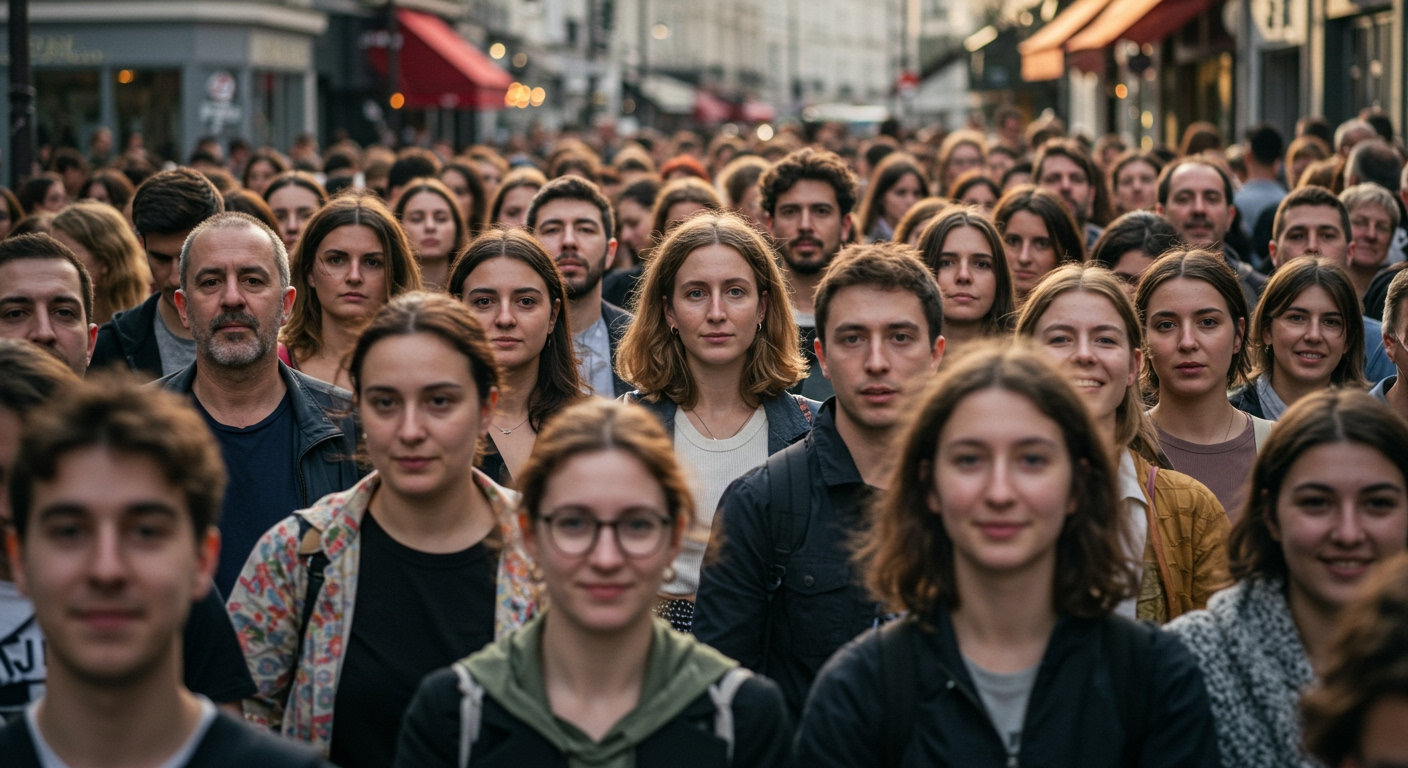


已成功儲存到 /content/drive/MyDrive/Imagen 3/output/1739075163_mAnudH_color_photography_of_:_in_france_in_2024,_in_the_street,_a_crowd_with_adults_all_looks_towards_the_lens_very_wide_framed_blurred_background.txt



In [5]:
!pip install -U -q google-genai

from google.colab import userdata, drive
from google import genai
import random, string, os
from IPython.display import clear_output
from datetime import datetime

def generate_timestamp():
    timestamp = int(datetime.now().timestamp())
    timestamp_str = str(timestamp)
    return timestamp_str

def generate_password(length=6):
    characters = string.ascii_letters
    return ''.join(random.choices(characters, k=length))

def truncate_text(text, limit=200):
    """截斷文字至指定長度，超過則加上省略號"""
    return text[:limit] + "_exceeding_200_words" if len(text) > limit else text

drive.mount('/content/drive')
output_dir = "/content/drive/MyDrive/Imagen 3/output/" # @param {type:"string"}

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL_ID = "imagen-3.0-generate-002"

prompt = "color photography of : in france in 2024, in the street, a crowd with adults all looks towards the lens. very wide framed. blurred background." # @param {type:"string"}
number_of_images = "1" # @param [1, 2, 3, 4]
person_generation = "ALLOW_ADULT" # @param ['DONT_ALLOW', 'ALLOW_ADULT']
aspect_ratio = "16:9" # @param ["1:1", "3:4", "4:3", "16:9", "9:16"]

result = client.models.generate_images(
    model=MODEL_ID,
    prompt=prompt,
    config=dict(
        number_of_images=number_of_images,
        output_mime_type="image/jpeg",
        person_generation=person_generation,
        aspect_ratio=aspect_ratio
    )
)

clear_output()

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"\n目錄已建立: {output_dir}\n")
else:
    print(f"\n目錄已存在: {output_dir}\n")

for generated_image in result.generated_images:
    password = generate_password()
    original_prompt = prompt
    prompt = prompt.replace(" ", "_").replace(".", "")
    timestamp = generate_timestamp()
    filename = f"{timestamp}_{password}_{prompt}"
    filename = truncate_text(filename)
    filename += ".jpeg"
    image = generated_image.image
    image.save(filename)
    image.show()
    dest_path = os.path.join(output_dir, filename)
    with open(filename, "rb") as src, open(dest_path, "wb") as dest:
        dest.write(src.read())
    filename = filename.replace(".jpeg",".txt")
    dest_path = os.path.join(output_dir, filename)
    with open(dest_path, "w", encoding="utf-8") as file:
      file.write(original_prompt)
    print(f"\n已成功儲存到 {dest_path}\n")
